# Importing Libraries And DataFrames

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree  import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
from sklearn.metrics import classification_report, f1_score
from tabulate import tabulate
import pickle

Creating Dataframe for dataset

In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/DLithe: Assignment 1(Fundamentals)/DATASETS/CYBER/Train_data.csv')

dataset consists of 42 columns and 25192 rows

In [ ]:
train_df.shape

(25192, 42)

In [ ]:
train_df.sample(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
10577,0,tcp,private,S0,0,0,0,0,0,0,...,5,0.02,0.07,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
4919,2775,udp,other,SF,147,105,0,0,0,0,...,1,0.00,0.65,0.91,0.00,0.0,0.0,0.0,0.0,normal
8419,0,tcp,http,S0,0,0,0,0,0,0,...,62,0.24,0.02,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
20247,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,149,0.58,0.01,0.58,0.00,0.0,0.0,0.0,0.0,anomaly
15129,0,tcp,ftp_data,SF,567,0,0,0,0,0,...,48,0.19,0.03,0.19,0.00,0.0,0.0,0.0,0.0,normal
25102,2,tcp,ftp_data,SF,2194619,0,0,0,0,0,...,75,0.55,0.36,0.55,0.03,0.0,0.0,0.0,0.0,normal
18201,0,tcp,private,S0,0,0,0,0,0,0,...,22,0.09,0.05,0.00,0.00,1.0,1.0,0.0,0.0,anomaly
8528,1,udp,private,SF,105,146,0,0,0,0,...,2,1.00,0.00,1.00,0.00,0.0,0.0,0.0,0.0,normal
3495,0,udp,domain_u,SF,45,67,0,0,0,0,...,247,0.97,0.01,0.00,0.00,0.0,0.0,0.0,0.0,normal
4713,29,udp,domain_u,SF,44,44,0,0,0,0,...,47,0.96,0.04,0.02,0.00,0.0,0.0,0.0,0.0,normal


In [ ]:
train_df.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
5,0,tcp,private,REJ,0,0,0,0,0,0,...,19,0.07,0.07,0.00,0.00,0.00,0.00,1.00,1.00,anomaly
6,0,tcp,private,S0,0,0,0,0,0,0,...,9,0.04,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
7,0,tcp,private,S0,0,0,0,0,0,0,...,15,0.06,0.07,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,23,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
9,0,tcp,private,S0,0,0,0,0,0,0,...,13,0.05,0.06,0.00,0.00,1.00,1.00,0.00,0.00,anomaly


In [ ]:
train_df.tail(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
25182,0,tcp,other,REJ,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.00,0.16,0.0,0.82,1.0,anomaly
25183,0,tcp,private,REJ,0,0,0,0,0,0,...,1,0.00,1.00,0.00,0.00,0.04,0.0,0.96,1.0,anomaly
25184,29,tcp,ftp,SF,329,1063,0,0,0,6,...,60,0.24,0.02,0.00,0.00,0.00,0.0,0.03,0.1,normal
25185,1,tcp,smtp,SF,2896,333,0,0,0,0,...,11,0.92,0.17,0.08,0.00,0.00,0.0,0.00,0.0,normal
25186,0,tcp,http,S1,339,14600,0,0,0,0,...,255,1.00,0.00,0.01,0.01,0.01,0.0,0.01,0.0,normal
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.0,1.00,1.0,anomaly
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.0,0.00,0.0,anomaly
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.0,1.00,1.0,anomaly
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.0,0.00,0.0,anomaly
25191,0,tcp,finger,S0,0,0,0,0,0,0,...,49,0.19,0.03,0.01,0.00,1.00,1.0,0.00,0.0,anomaly


In [ ]:
train_df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

# Data Cleaning

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
train_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Renaming class column as target

In [ ]:
train_df.rename(columns={'class':'target'},inplace=True)

In [ ]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')

In [ ]:
train_df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

Checking for duplicate rows

In [ ]:
train_df.duplicated().sum()

0

Object Types

In [ ]:
train_df.describe(include='object')

,protocol_type,service,flag,target
count,25192,25192,25192,25192
unique,3,66,11,2
top,tcp,http,SF,normal
freq,20526,8003,14973,13449


There are 3 values in protocol_type column

In [ ]:
train_df['protocol_type'].value_counts()

tcp     20526
udp      3011
icmp     1655
Name: protocol_type, dtype: int64

In [ ]:
train_df['service'].value_counts()

http         8003
private      4351
domain_u     1820
smtp         1449
ftp_data     1396
             ... 
urh_i           4
red_i           3
pm_dump         3
tim_i           2
http_8001       1
Name: service, Length: 66, dtype: int64

In [ ]:
train_df['flag'].value_counts()

SF        14973
S0         7009
REJ        2216
RSTR        497
RSTO        304
S1           88
SH           43
RSTOS0       21
S2           21
S3           15
OTH           5
Name: flag, dtype: int64

In [ ]:
train_df['target'].value_counts()

normal     13449
anomaly    11743
Name: target, dtype: int64

In [ ]:
train_df.iloc[8783]

duration                             0
protocol_type                      tcp
service                        private
flag                                S0
src_bytes                            0
dst_bytes                            0
land                                 0
wrong_fragment                       0
urgent                               0
hot                                  0
num_failed_logins                    0
logged_in                            0
num_compromised                      0
root_shell                           0
su_attempted                         0
num_root                             0
num_file_creations                   0
num_shells                           0
num_access_files                     0
num_outbound_cmds                    0
is_host_login                        0
is_guest_login                       0
count                              134
srv_count                           10
serror_rate                        1.0
srv_serror_rate          

Encoding Values of protocol_type,service,flag and target columns

In [ ]:
map_pro={'tcp':0, 'udp':1, 'icmp':2}
train_df['protocol_type']=train_df['protocol_type'].map(map_pro)

In [ ]:
encoder = LabelEncoder()
train_df['service'] = encoder.fit_transform(train_df['service'])
train_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,0,19,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,1,41,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,0,46,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,0,22,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,0,22,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
map_flag={'SF':0, 'S0':1, 'REJ':2, 'RSTR':3, 'SH':4, 'RSTO':5, 'S1':6, 'RSTOS0':7, 'S3':8,'S2':9, 'OTH':10}
train_df['flag']=train_df['flag'].map(map_flag)

In [ ]:
map_target={'normal':0,'anomaly':1}
train_df['target']=train_df['target'].map(map_target)

In [ ]:
train_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target
0,0,0,19,0,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,0
1,0,1,41,0,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,0
2,0,0,46,1,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,1
3,0,0,22,0,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,0
4,0,0,22,0,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,0,16,5,0,0,0,0,0,0,...,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00,1
25188,0,0,19,0,334,0,0,0,0,0,...,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00,1
25189,0,0,46,2,0,0,0,0,0,0,...,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00,1
25190,0,0,38,1,0,0,0,0,0,0,...,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00,1


# Data Analysis

<Axes: xlabel='target', ylabel='count'>

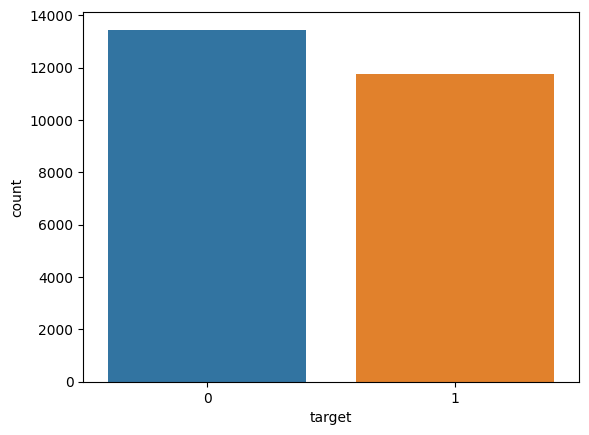

In [ ]:
sns.countplot(x=train_df['target'])

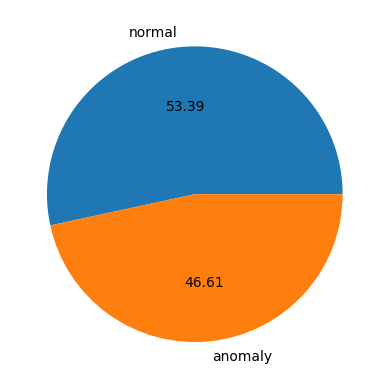

In [ ]:
plt.pie(train_df['target'].value_counts(), labels=['normal','anomaly'],autopct="%0.2f")
plt.show()

In [ ]:
train_df['is_host_login'].value_counts()

0    25192
Name: is_host_login, dtype: int64

In [ ]:
train_df['num_outbound_cmds'].value_counts()

0    25192
Name: num_outbound_cmds, dtype: int64

In [ ]:
train_df=train_df.drop(columns=['is_host_login','num_outbound_cmds'],axis=1)

In [ ]:
train_df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target'],
      dtype='object')

In [ ]:
plt.figure(figsize=(100, 100))
sns.heatmap(train_df.corr(), annot = True)
plt.show()

# Model building

In [ ]:
X_train = train_df.drop(['target','protocol_type','dst_bytes','land','wrong_fragment','urgent','logged_in','srv_count','serror_rate','srv_serror_rate','same_srv_rate','dst_host_serror_rate','dst_host_srv_serror_rate','hot','num_compromised','root_shell','su_attempted','num_root','num_file_creations','num_shells','num_access_files','is_guest_login','srv_diff_host_rate','dst_host_srv_count','dst_host_same_srv_rate'], axis=1)
Y_train = train_df['target']

In [ ]:
X_train.columns

Index(['duration', 'service', 'flag', 'src_bytes', 'num_failed_logins',
       'count', 'rerror_rate', 'srv_rerror_rate', 'diff_srv_rate',
       'dst_host_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate',
       'dst_host_rerror_rate', 'dst_host_srv_rerror_rate'],
      dtype='object')

Spliting of training dataset

In [ ]:
X_train.iloc[8783]

duration                         0.00
service                         46.00
flag                             1.00
src_bytes                        0.00
num_failed_logins                0.00
count                          134.00
rerror_rate                      0.00
srv_rerror_rate                  0.00
diff_srv_rate                    0.04
dst_host_count                 255.00
dst_host_diff_srv_rate           0.04
dst_host_same_src_port_rate      0.00
dst_host_srv_diff_host_rate      0.00
dst_host_rerror_rate             0.00
dst_host_srv_rerror_rate         0.00
Name: 8783, dtype: float64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.2, random_state=3)

In [ ]:
x_train.shape, y_train.shape

((20153, 15), (20153,))

In [ ]:
x_test.shape, y_test.shape

((5039, 15), (5039,))

KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3, metric = 'minkowski')
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
KNN_train=accuracy_score(y_train,knn.predict(x_train))
KNN_test=accuracy_score(y_test,knn.predict(x_test))
KNN_sensitivity =recall_score(y_test,knn.predict(x_test),average='weighted')
KNN_error_rate = 1.0 - accuracy_score(y_test,knn.predict(x_test))
KNN_f1_score = f1_score(y_test,knn.predict(x_test),average='weighted')

In [ ]:
def calculate_specificity(y_true, knn_y_pred, class_label):
    true_negative = np.sum((y_true != class_label) & (knn.predict(x_test) != class_label))
    false_positive = np.sum((y_true != class_label) & (knn.predict(x_test) == class_label))
    specificity = true_negative / (true_negative + false_positive)
    return specificity
class_label = 0
KNN_specificity = calculate_specificity(y_test, knn.predict(x_test), class_label)

Support Vector Machine

Logistic Regression

In [ ]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
lg_train=accuracy_score(y_train,lg.predict(x_train))
lg_test=accuracy_score(y_test,lg.predict(x_test))
lg_sensitivity =recall_score(y_test,lg.predict(x_test),average='weighted')
lg_error_rate = 1.0 - accuracy_score(y_test,lg.predict(x_test))
lg_f1_score = f1_score(y_test,lg.predict(x_test),average='weighted')
def calculate_specificity(y_true, y_pred, class_label):
    true_negative = np.sum((y_true != class_label) & (y_pred != class_label))
    false_positive = np.sum((y_true != class_label) & (y_pred == class_label))
    specificity = true_negative / (true_negative + false_positive)
    return specificity
class_label = 0
lg_specificity = calculate_specificity(y_test, lg.predict(x_test), class_label)

GradientBoostingClassifier

In [ ]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_train=accuracy_score(y_train,gb.predict(x_train))
gb_test=accuracy_score(y_test,gb.predict(x_test))
gb_sensitivity =recall_score(y_test,gb.predict(x_test),average='weighted')
gb_error_rate = 1.0 - accuracy_score(y_test,gb.predict(x_test))
gb_f1_score = f1_score(y_test,gb.predict(x_test),average='weighted')
def calculate_specificity(y_true, y_pred, class_label):
    true_negative = np.sum((y_true != class_label) & (y_pred != class_label))
    false_positive = np.sum((y_true != class_label) & (y_pred == class_label))
    specificity = true_negative / (true_negative + false_positive)
    return specificity
class_label = 0
gb_specificity = calculate_specificity(y_test, gb.predict(x_test), class_label)

RandomForestClassifier

In [ ]:
rf = clf = RandomForestClassifier(n_estimators=50)
rf.fit(x_train,y_train)
rf_train=accuracy_score(y_train,rf.predict(x_train))
rf_test=accuracy_score(y_test,rf.predict(x_test))
rf_sensitivity =recall_score(y_test,rf.predict(x_test),average='weighted')
rf_error_rate = 1.0 - accuracy_score(y_test,rf.predict(x_test))
rf_f1_score = f1_score(y_test,rf.predict(x_test),average='weighted')
def calculate_specificity(y_true, clf_y_pred, class_label):
    true_negative = np.sum((y_true != class_label) & (clf_y_pred != class_label))
    false_positive = np.sum((y_true != class_label) & (clf_y_pred == class_label))
    specificity = true_negative / (true_negative + false_positive)
    return specificity
class_label = 0
rf_specificity = calculate_specificity(y_test, rf.predict(x_test), class_label)

In [ ]:
data = [["KNN", KNN_train, KNN_test,KNN_sensitivity,KNN_error_rate,KNN_f1_score,KNN_specificity],
        ["Logistic Regression", lg_train, lg_test,lg_sensitivity,lg_error_rate,lg_f1_score,lg_specificity],
        ["GradientBoostingClassifier", gb_train, gb_test,gb_sensitivity,gb_error_rate,gb_f1_score,gb_specificity],
        ["RandomForestClassifier", rf_train, rf_test,rf_sensitivity,rf_error_rate,rf_f1_score,rf_specificity]
        ]
col_names = ["Model", "Train Score", "Test Score","Sensitivity","Error Rate","F1 Score","Specificity"]
print(tabulate(data, headers=col_names, tablefmt="fancy_grid"))

╒════════════════════════════╤═══════════════╤══════════════╤═══════════════╤══════════════╤════════════╤═══════════════╕
│ Model                      │   Train Score │   Test Score │   Sensitivity │   Error Rate │   F1 Score │   Specificity │
╞════════════════════════════╪═══════════════╪══════════════╪═══════════════╪══════════════╪════════════╪═══════════════╡
│ KNN                        │      0.994046 │     0.989284 │      0.989284 │   0.0107164  │   0.989283 │      0.987851 │
├────────────────────────────┼───────────────┼──────────────┼───────────────┼──────────────┼────────────┼───────────────┤
│ Logistic Regression        │      0.77914  │     0.778527 │      0.778527 │   0.221473   │   0.777637 │      0.721827 │
├────────────────────────────┼───────────────┼──────────────┼───────────────┼──────────────┼────────────┼───────────────┤
│ GradientBoostingClassifier │      0.994492 │     0.994245 │      0.994245 │   0.00575511 │   0.994244 │      0.99204  │
├───────────────────────

In [ ]:
clfs = {
    'LogisticRegression':lg,
    'KNeighborsClassifier':knn,
    'RandomForestClassifier':rf,
    'GradientBoostingClassifier':gb,
}

In [ ]:
def train_classifier(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, precision, f1, confusion, report

In [ ]:
accuracy_scores = []
precision_scores = []
f1_scores = []
confusion_matrices = []
classification_reports = []
for name, clf in clfs.items():
    current_accuracy, current_precision, current_f1, current_confusion, current_report = train_classifier(clf, x_train, y_train, x_test, y_test)
    print(f"Classifier: {name}")
    print(f"Accuracy: {current_accuracy:.4f}")
    print(f"Precision: {current_precision:.4f}")
    print(f"F1 Score: {current_f1:.4f}")
    print("Confusion Matrix:")
    print(current_confusion)
    print("Classification Report:")
    print(current_report)
    print("-" * 40)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    f1_scores.append(current_f1)
    confusion_matrices.append(current_confusion)
    classification_reports.append(current_report)

Classifier: LogisticRegression
Accuracy: 0.7785
Precision: 0.7922
F1 Score: 0.7554
Confusion Matrix:
[[2200  452]
 [ 664 1723]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.83      0.80      2652
           1       0.79      0.72      0.76      2387

    accuracy                           0.78      5039
   macro avg       0.78      0.78      0.78      5039
weighted avg       0.78      0.78      0.78      5039

----------------------------------------
Classifier: KNeighborsClassifier
Accuracy: 0.9893
Precision: 0.9895
F1 Score: 0.9887
Confusion Matrix:
[[2627   25]
 [  29 2358]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2652
           1       0.99      0.99      0.99      2387

    accuracy                           0.99      5039
   macro avg       0.99      0.99      0.99      5039
weighted avg       0.99      0.99      0.99      5039

-

In [ ]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'F1 Score':f1_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision,F1 Score
2,RandomForestClassifier,0.996031,0.998316,0.995800
3,GradientBoostingClassifier,0.994245,0.995795,0.993914
1,KNeighborsClassifier,0.989284,0.989509,0.988679
0,LogisticRegression,0.778527,0.792184,0.755370


In [ ]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,RandomForestClassifier,Accuracy,0.996031
1,GradientBoostingClassifier,Accuracy,0.994245
2,KNeighborsClassifier,Accuracy,0.989284
3,LogisticRegression,Accuracy,0.778527
4,RandomForestClassifier,Precision,0.998316
5,GradientBoostingClassifier,Precision,0.995795
6,KNeighborsClassifier,Precision,0.989509
7,LogisticRegression,Precision,0.792184
8,RandomForestClassifier,F1 Score,0.995800
9,GradientBoostingClassifier,F1 Score,0.993914


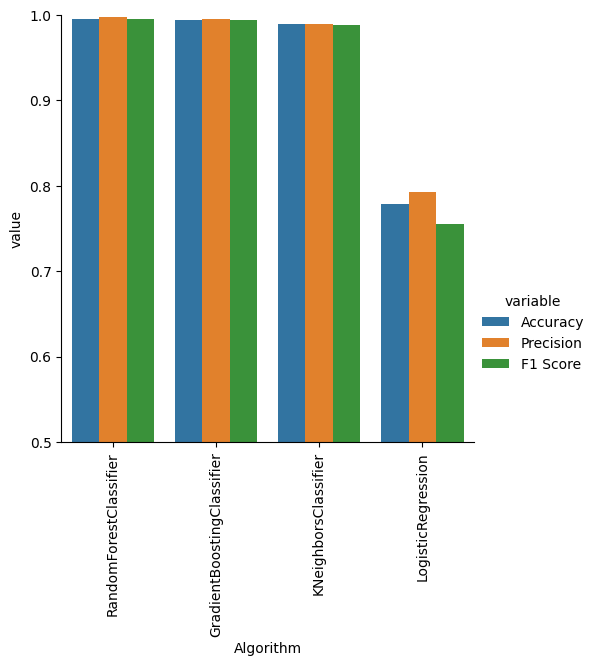

In [ ]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [ ]:
for name, clf in clfs.items():
  pickle.dump(clf,open('/content/drive/MyDrive/DLithe: Assignment 1(Fundamentals)/DATASETS/CYBER/Models/'+name+'_model.pkl','wb'))

Build Artificial Neural Network

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
    Dense(units=64, activation='relu', input_dim=X_train.shape[1]),
    Dense(units=32, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
630/630 [==============================] - 2s 4ms/step - loss: 807.1392 - accuracy: 0.9470 - val_loss: 4082.0471 - val_accuracy: 0.5225
Epoch 2/10
630/630 [==============================] - 2s 3ms/step - loss: 1460.0879 - accuracy: 0.9148 - val_loss: 130.2427 - val_accuracy: 0.9438
Epoch 3/10
630/630 [==============================] - 2s 3ms/step - loss: 3987.1377 - accuracy: 0.9303 - val_loss: 4516.1807 - val_accuracy: 0.9250
Epoch 4/10
630/630 [==============================] - 1s 2ms/step - loss: 3880.8049 - accuracy: 0.9382 - val_loss: 1793.7609 - val_accuracy: 0.9500
Epoch 5/10
630/630 [==============================] - 2s 2ms/step - loss: 614.1760 - accuracy: 0.9476 - val_loss: 78.4285 - val_accuracy: 0.9557
Epoch 6/10
630/630 [==============================] - 2s 3ms/step - loss: 2081.3232 - accuracy: 0.9465 - val_loss: 2640.8916 - val_accuracy: 0.9438
Epoch 7/10
630/630 [==============================] - 2s 3ms/step - loss: 3802.2283 - accuracy: 0.9348 - val_loss: 60

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')
print(f'Test accuracy: {accuracy}')

158/158 [==============================] - 0s 2ms/step - loss: 6638.6909 - accuracy: 0.9424
Test loss: 6638.69091796875
Test accuracy: 0.9424489140510559


[0.0
,22.0
,0.0
,240.0
,0.0
,10.0
,0.0
,0.0
,0.0
,255.0
,0.0
,0.0
,0.0
,0.0,
0.0]-Normal

[0.00
,46.00
,1.00
,0.00
,0.00
,134.00
,0.00
,0.00
,0.04
,255.00
,0.04
,0.00
,0.00
,0.00
,0.00]-Anomaly

In [ ]:
data = np.array([0.00 ,46.00 ,1.00 ,0.00 ,0.00 ,134.00 ,0.00 ,0.00 ,0.04 ,255.00 ,0.04 ,0.00 ,0.00 ,0.00 ,0.00]).reshape(1, -1)
for name, clf in clfs.items():
    if clf.predict(data)[0] == 1:
      res="Anomaly"
    else:
      res="Normal"
    print(name+" : "+res)

LogisticRegression : Anomaly
KNeighborsClassifier : Anomaly
RandomForestClassifier : Anomaly
GradientBoostingClassifier : Anomaly


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [ ]:
data = np.array([0.00 ,46.00 ,1.00 ,0.00 ,0.00 ,134.00 ,0.00 ,0.00 ,0.04 ,255.00 ,0.04 ,0.00 ,0.00 ,0.00 ,0.00]).reshape(1,-1)
if model.predict(data)[0] > 0.5:
  print("Anomaly")
else:
   print("Normal")

1/1 [==============================] - 0s 91ms/step
Anomaly
